In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import numpy.linalg as la
import sys

In [132]:
G = const.G #gravitational constant
data = np.loadtxt('gravdata.txt')
x = data[:,0]*1e3 # x coordinate
xs = x**2
d = data[:,1] # data
#18x10 Matrix containing derivatives
def F_Dgm(xs,m0):
    """Compute derivative matrix"""
    Dgm = np.empty((18,10))
    for i in range(18):
        Dgm[i,0] = G*np.log( (xs[i]+(np.cumsum(m0[5])[-1])**2)/xs[i])
        for j in np.arange(1,5):
            Dgm[i,j] = G*np.log( (xs[i]+(np.cumsum(m0[5:6+j])[-1])**2)/(xs[i]+(np.cumsum(m0[5:5+j])[-1])**2))
        Dgm[i,5] = 0
        for j in np.arange(6,10):
            Dgm[i,j] = G*m0[j-5]*((xs[i]+(np.cumsum(m0[5:j+1])[-1])**2)/ (xs[i]+(np.cumsum(m0[5:j])[-1])**2)*2*np.cumsum(m0[5:j])[-1])
    return Dgm
def forward(xs, m0):
    """Data predicted given the model parameters"""
    d0 = G*m0[0]*np.log( (xs+m0[5]**2)/xs)
    for i in np.arange(1,5):
        d0 += G*m0[i]*np.log( (xs+np.cumsum(m0[5:6+i])[-1]**2)/ (xs+np.cumsum(m0[5:i+5])[-1]**2) )
    return d0

def F_delta_m(Dgm, dd,eps):
    """Given delta_d and matrix with derivatives returns delta_m"""
    dd = np.reshape(dd, (len(dd),1))
    return (la.inv(Dgm.T@Dgm+eps**2*np.eye(10))@Dgm.T@dd).flatten()

In [143]:
#initial guess stored as described in the hint
m0 = np.array([ 100., 400, 800, 500, 50, 3000, 2000, 6000, 9000, 10000])
n = 0
p = p0
alpha, epsilon, nmax = .001, 1e-10, 7000
misfit = np.zeros((nmax))
while n<nmax:
    d0 = forward(xs,m0)
    dd = d-d0
    misfit[n] = np.inner(dd,dd)
    m = m0+alpha*F_delta_m(F_Dgm(xs,m0), dd,epsilon)
    m0 = m
    n+=1

<BarContainer object of 5 artists>

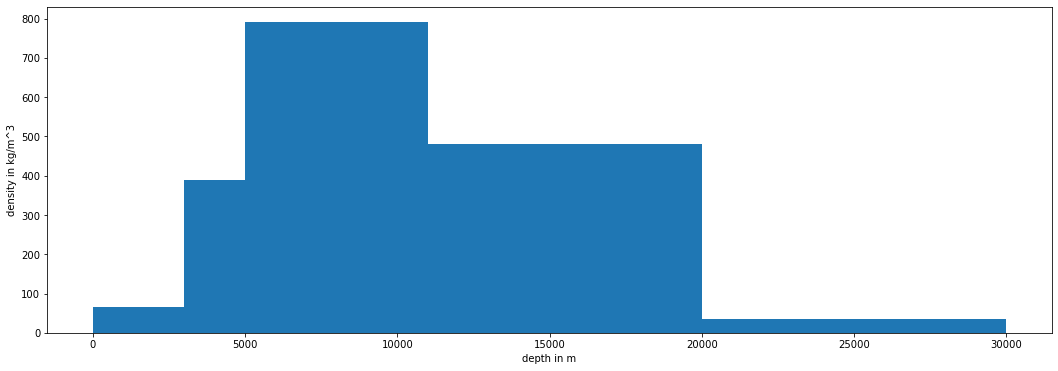

In [144]:
dz = m[5:]
z_base = np.cumsum(dz)
z_top = np.insert(z_base,0, values = 0)[:-1]
fig, ax = plt.subplots(figsize = (18,6))
ax.set_xlabel('depth in m')
ax.set_ylabel('density in kg/m^3')
ax.axes.bar(x = (z_top+z_base)/2,height = m[:5], width = dz)

[]

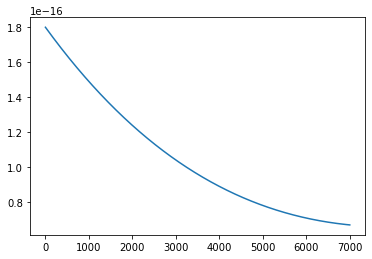

In [145]:
fig,ax = plt.subplots()
ax.plot(np.arange(nmax), misfit)
ax.plot()